<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/GAS-DZ.3/%D0%94%D0%97_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

Определить угол поворота в рабочем колесе $\Delta \beta = \beta_1 - \beta_2$ на среднем радиусе, если подведенная работа $L_{ст}$ = 25 кДж/кг, окружная скорость вращения колеса на среднем радиусе u = 328 м/c. Составляющие скорости на входе $c_{1u}$ = 70 м/с, $c_{1a}$ = 145 м/c. Принять $c_{1a} = c_{2a} = w_{1a} = w_{2a}$. Построить треугольники скоростей и вывести скорости и углы.


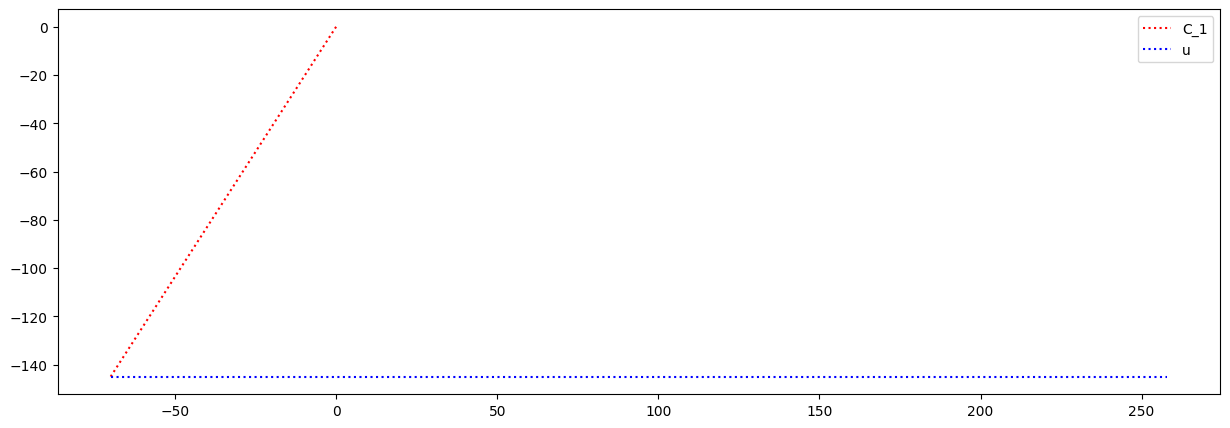

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

MPa = 1e6
to_kelvin = lambda x: x + 273.15
kJ = 1e3
MW = 1e6

average_diameter = 0.5
u = 328 #м/с

c_1_a = 145
c_1_u = 70
stage_work = 25 * kJ

w_1_a = c_1_a
w_2_a = c_1_a
c_2_a = c_1_a

def plot_triangle(
    ax,
    u = None,
    c_a = None,
    c_u = None,
    w_a = None,
    w_u = None,
    **kwargs,
):
    if c_u and c_a:
        ax.plot([0, -c_u], [0, -c_a], label='C_1', color='red', **kwargs)
    if w_u and w_a:
        ax.plot([0, -w_u], [0, -w_a], label='W_1', color='green', **kwargs)
    if (c_u and c_a) or (w_u and w_a):
        if c_u and c_a:
            ax.plot([-c_u, -c_u + u], [-c_a, -c_a], label='u', color='blue', **kwargs)
        else:
            ax.plot([-w_u, -w_u - u], [-w_a, -w_a], label='u', color='blue', **kwargs)
    ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, linestyle="dotted")


In [9]:
w_1_u = c_1_u - u

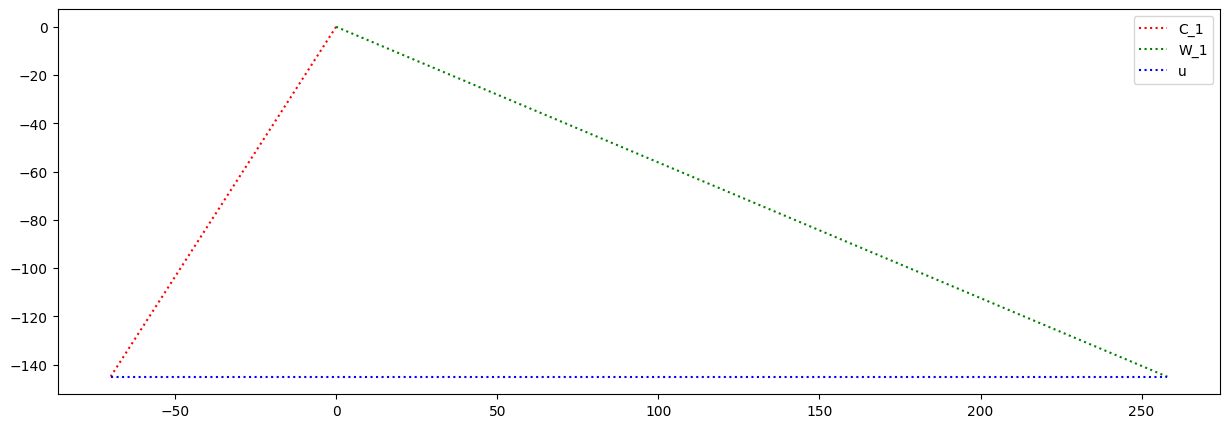

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")

In [11]:
w_1 = (w_1_a ** 2 + w_1_u ** 2) ** 0.5

beta_1 = np.rad2deg(np.arccos(w_1_u / w_1))

delta_w_u = stage_work / u

w_2_u = w_1_u + delta_w_u

w_2 = (w_2_a ** 2 + w_2_u**2) ** 0.5

beta_2 = np.rad2deg(np.arccos(w_2_u / w_2))

delta_beta = beta_1 - beta_2
print("Угол поворота в рабочем колесе", delta_beta)
#print("", w_1_u)
print("Относительная скоротсь входа", w_1)
#print("", w_2_u)
print("Относительная скорость выхода", w_2)


Угол поворота в рабочем колесе 9.241489837698168
Относительная скоротсь входа 295.95438837766875
Относительная скорость выхода 232.52773113454535


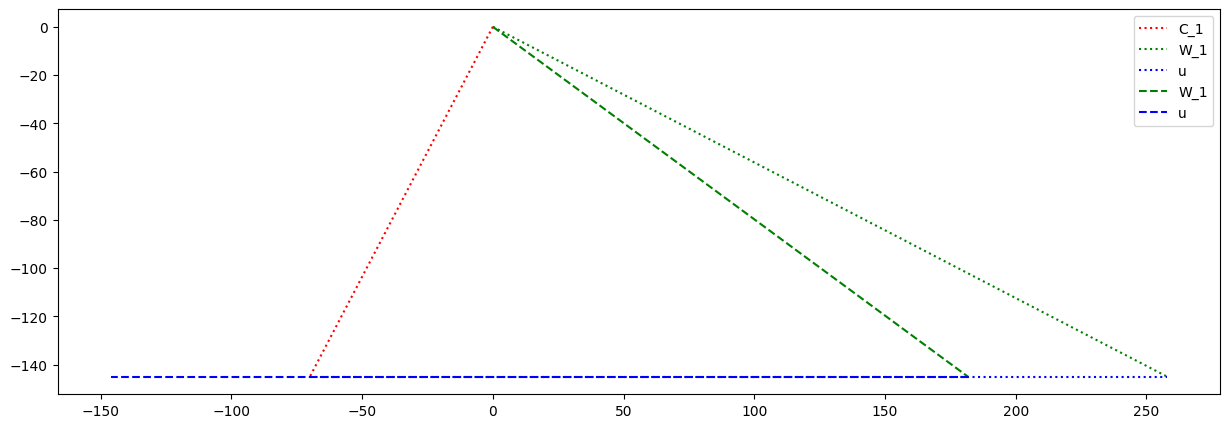

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")
plot_triangle(ax=ax, u=u, w_a=w_2_a, w_u=w_2_u, linestyle="dashed")